# Videogame analysis

Here videogame critical and sales data is cleaned and analysed.

The most prolific platforms in terms of number of games released are  PC, PlayStation 4, XBox 360, Switch and PlayStation 2.

The most critically acclaimed platforms are:
- Nintendo 64
- XBox Series X
- PlayStation
- PlayStation 5
- Dreamcast

The most acclaimed platforms by user opinion are:
- Nintendo 64
- Dreamcast
- PlayStation
- PlayStation2
- GameBoy Advance

There is no significant relationship found between reviews and sales suggesting quality of game is not important to be successful.

The most commercially successful platforms are
- Nintendo 64
- PlayStation
- Wii
- PlayStation 3
- Wii U

Critical opinion shows that Open-world, Dancing, City Building and Ice Hocky are the most well recieved genres.

Users most enjoy City Building, Street, Compilation and Open world games.

Ice Hockey games produce the best sales, followed by Virtual Life, Modern, Party and Shooter games.



# Import packages and load data

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
plt.rcParams['figure.figsize'] = [10,8]
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')
from itertools import product
import matplotlib.colors as cs


In [2]:
df_meta = pd.read_json('./metacritic_data_130223.json')
df_sales = pd.read_csv('./gamesales_150223.csv')

In [3]:
df_meta.head()

,name,platform,date,user_score,metascore,genre,no_ratings,no_reviews
0,Halo 3,Xbox 360,2007-09-25,8.2,94,"Action, Shooter, Shooter, First-Person, Sci-Fi...",5406.0,86
1,SoulCalibur II,PlayStation 2,2003-08-27,8.7,92,"Action, Fighting, 3D",180.0,41
2,LittleBigPlanet 2,PlayStation 3,2011-01-18,8.6,91,"Action, Platformer, Platformer, 3D, 2D, 3D",814.0,86
3,Myth: The Fallen Lords,PC,1997-10-31,8.5,91,"Strategy, Real-Time, Fantasy, General, Fantasy",101.0,9
4,Medal of Honor: Allied Assault,PC,2002-01-20,8.5,91,"Action, Shooter, Shooter, First-Person, Histor...",592.0,34


In [4]:
df_sales.head()


,name,developer,date,platform,total_sales,NA_sales,PAL_sales,japan_sales,other_sales
0,Tetris,Alexey Pajitnov,01st Jan 88,Series,NaN,NaN,NaN,NaN,NaN
1,Pokemon,Game Freak,28th Sep 98,Series,NaN,NaN,NaN,NaN,NaN
2,Call of Duty,Infinity Ward,29th Oct 03,Series,NaN,NaN,NaN,NaN,NaN
3,Super Mario,Nintendo,20th Jul 83,Series,NaN,NaN,NaN,NaN,NaN
4,Grand Theft Auto,Rockstar North,27th Mar 98,Series,NaN,NaN,NaN,NaN,NaN


# Data Cleaning and pre-processing

### Cleaning and processing sales data

In [5]:
def convert_m(x):
    if type(x)==str:
        return(float(x.replace('m','')))
    return(x)

#convert sales data to float
sales_columns = ['total_sales','NA_sales','PAL_sales','japan_sales','other_sales']
df_sales[sales_columns] = df_sales[sales_columns].applymap(convert_m)


In [6]:
platform_replace = {'PS': 'PlayStation',
                    'PS2': 'PlayStation 2',
                    'PS3': 'PlayStation 3',
                    'PS4': 'PlayStation 4',
                    'PS5': 'PlayStation 5',
                    'X360': 'Xbox 360',
                    'XOne': 'Xbox One',
                    'XB': 'Xbox',
                    'GC': 'GameCube',
                    'GBA': 'Game Boy Advance',
                    'PSV': 'PlayStation Vita',
                    'WiiU': 'Wii U',
                    'DC': 'Dreamcast',
                    'N64': 'Nintendo 64',
                    'XS': 'Xbox Series X'
                    }

#rename sales platform to meta names
df_sales['platform'] = df_sales['platform'].apply(lambda x: x.replace(x,platform_replace[x]) if x in platform_replace.keys() else x)


### Create aggregated sales per game across all platforms

In [7]:

#add sales for all versions and replace NaN
df_agg = df_sales[sales_columns].groupby(pd.factorize(df_sales['name'])[0]).sum()
df_agg = df_agg.replace(0,np.nan)

#add name
df_agg['name'] = df_sales['name'].groupby(pd.factorize(df_sales['name'])[0]).agg(lambda x: x.values[0])
#how many versions of game
df_agg['no_version'] = df_sales['name'].groupby(pd.factorize(df_sales['name'])[0]).count()
#drop entries with no sales information
df_agg.dropna(how='all',subset=['total_sales','NA_sales','PAL_sales','japan_sales'],inplace=True)
df_agg.head()


,total_sales,NA_sales,PAL_sales,japan_sales,other_sales,name,no_version
0,35.84,26.17,2.95,6.03,0.69,Tetris,5
2,0.01,NaN,0.01,NaN,NaN,Call of Duty,4
4,2.56,0.96,1.41,0.04,0.14,Grand Theft Auto,6
6,33.83,15.03,12.42,2.52,3.86,Minecraft,13
8,11.29,5.20,4.49,0.16,1.44,Assassin's Creed,7


### Cleaning and processing review data

In [8]:
df_meta.dtypes

name                  object
platform              object
date          datetime64[ns]
user_score            object
metascore              int64
genre                 object
no_ratings           float64
no_reviews             int64
dtype: object

In [102]:
# deal with missing values
df_meta.isna().sum()

name             0
platform         0
date             0
user_score       0
metascore        0
genre            0
no_ratings    1383
no_reviews       0
dtype: int64

In [107]:
# drop rows with no user ratings and tbd user score and convert to correct types

df_meta_clean = df_meta.dropna()
df_meta_clean['no_ratings'] = df_meta_clean['no_ratings'].astype(np.int64)

df_meta_clean['user_score'].replace('tbd',np.nan,inplace=True)
df_meta_clean.dropna(inplace=True)
df_meta_clean['user_score'] = df_meta_clean['user_score'].astype(np.float64)
df_meta_clean['user_score'] = df_meta_clean['user_score']*10
df_meta_clean['user_score'] = df_meta_clean['user_score'].astype(np.int64)

df_meta_clean.dtypes


name                  object
platform              object
date          datetime64[ns]
user_score             int64
metascore              int64
genre                 object
no_ratings             int64
no_reviews             int64
dtype: object

In [108]:
#Taking lead genre of each game

df_meta_clean['genre'] = df_meta_clean['genre'].apply(lambda x: x.split(',')[0])

### Merging sales and metacritic dataframes

In [109]:

df_merged = pd.merge(df_meta_clean,df_sales.drop('date',axis=1),left_on=['name','platform'],right_on = ['name','platform'])
df_merged.head(10)

,name,platform,date,user_score,metascore,genre,no_ratings,no_reviews,developer,total_sales,NA_sales,PAL_sales,japan_sales,other_sales
0,Halo 3,Xbox 360,2007-09-25,82,94,Action,5406,86,Bungie Studios,12.13,7.97,2.81,0.13,1.21
1,SoulCalibur II,PlayStation 2,2003-08-27,87,92,Action,180,41,Namco,2.06,1.06,0.62,0.13,0.25
2,LittleBigPlanet 2,PlayStation 3,2011-01-18,86,91,Action,814,86,Media Molecule,3.43,1.83,1.07,0.06,0.47
3,Myth: The Fallen Lords,PC,1997-10-31,85,91,Strategy,101,9,Bungie Software,NaN,NaN,NaN,NaN,NaN
4,Medal of Honor: Allied Assault,PC,2002-01-20,85,91,Action,592,34,"2015, Inc.",0.00,NaN,0.00,NaN,0.00
5,ESPN NFL Football,PlayStation 2,2003-09-03,85,91,Sports,25,20,Visual Concepts,0.56,0.27,0.21,NaN,0.07
6,Dead Space,Xbox 360,2008-10-13,88,89,Action,1021,79,EA Redwood Shores,1.40,0.89,0.39,NaN,0.13
7,Nuclear Throne,PC,2015-12-05,78,89,General,235,15,Vlambeer,NaN,NaN,NaN,NaN,NaN
8,Bastion,PlayStation 4,2015-04-07,77,89,Role-Playing,357,13,Supergiant Games,NaN,NaN,NaN,NaN,NaN
9,Dark Souls II,PC,2014-04-25,72,91,Action RPG,3030,36,From Software,0.19,0.09,0.08,NaN,0.02


In [110]:
#remove entries with no sales data
df_merged.dropna(subset='total_sales',inplace=True)
df_merged.head(10)


,name,platform,date,user_score,metascore,genre,no_ratings,no_reviews,developer,total_sales,NA_sales,PAL_sales,japan_sales,other_sales
0,Halo 3,Xbox 360,2007-09-25,82,94,Action,5406,86,Bungie Studios,12.13,7.97,2.81,0.13,1.21
1,SoulCalibur II,PlayStation 2,2003-08-27,87,92,Action,180,41,Namco,2.06,1.06,0.62,0.13,0.25
2,LittleBigPlanet 2,PlayStation 3,2011-01-18,86,91,Action,814,86,Media Molecule,3.43,1.83,1.07,0.06,0.47
4,Medal of Honor: Allied Assault,PC,2002-01-20,85,91,Action,592,34,"2015, Inc.",0.00,NaN,0.00,NaN,0.00
5,ESPN NFL Football,PlayStation 2,2003-09-03,85,91,Sports,25,20,Visual Concepts,0.56,0.27,0.21,NaN,0.07
6,Dead Space,Xbox 360,2008-10-13,88,89,Action,1021,79,EA Redwood Shores,1.40,0.89,0.39,NaN,0.13
9,Dark Souls II,PC,2014-04-25,72,91,Action RPG,3030,36,From Software,0.19,0.09,0.08,NaN,0.02
10,Far Cry,PC,2004-03-23,80,89,Action,1169,72,Crytek,0.05,NaN,0.04,NaN,0.01
12,Red Faction,PlayStation 2,2001-05-21,79,88,Action,103,25,Volition Inc.,1.92,0.76,0.96,NaN,0.20
13,JSRF: Jet Set Radio Future,Xbox,2002-02-25,84,88,Action,137,36,Smilebit,0.21,0.13,0.04,0.03,0.01


# metacritic data analysis

### find most common platforms


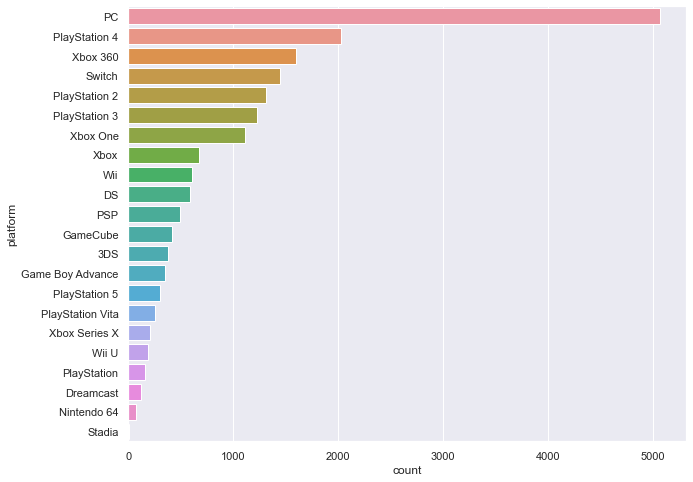

In [18]:

platform_counts = df_meta_clean['platform'].value_counts().reset_index()

ax = sns.barplot(data=platform_counts,y='index',x='platform')
lab = ax.set(ylabel='platform',xlabel='count')

In [19]:
# plot most common platforms by date

df_meta_clean['date'].min()
date_bins = list(map(lambda y: datetime(y,1,1),np.arange(1995,2030,1)))
df_meta_clean['date_bin'] = pd.cut(df_meta_clean['date'].astype(np.datetime64),np.array(date_bins, dtype=np.datetime64))

df_platform_ts = df_meta_clean.groupby('date_bin').apply(lambda x: x['platform'].value_counts())


In [22]:
# rearrange to an easily plottable format

data_dict = {}
for p in df_platform_ts.index.levels[1]:
    data_dict[p]=[]

for d,p in product(df_platform_ts.index.levels[0],df_platform_ts.index.levels[1]):
    if (d,p) in df_platform_ts.index:
        data_dict[p].append(df_platform_ts.loc[(d,p)])
    else:
         data_dict[p].append(np.nan)

platform_plot_ts = pd.DataFrame(data_dict,index = df_platform_ts.index.levels[0])


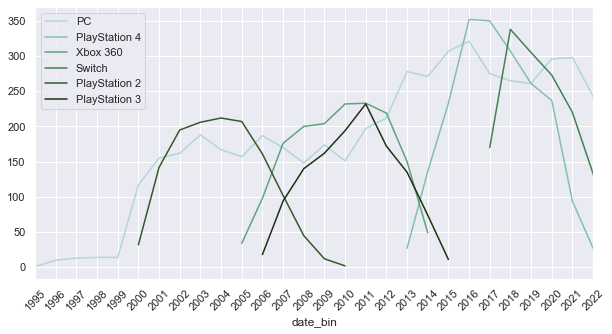

In [45]:
#Playstation 4 has the highest number of games in 2016 and 2017
#PC has longest record

fig,ax = plt.subplots(figsize=[10,5])
platform_plot_ts[platform_counts.loc[:5]['index'].values].plot(ax=ax,rot=45,cmap=sns.cubehelix_palette(as_cmap=True,light=.8,start=1.5))
params = ax.set(xticks = np.arange(0,28,1),
              xticklabels = np.arange(1995,2023,1),
              xlim = (0,27))


### Highest ratings by platform


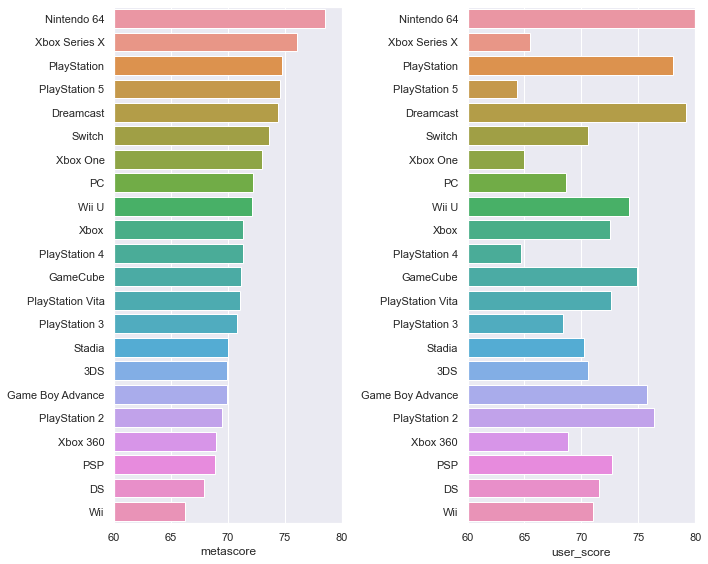

In [111]:
# Highest critic ratings include most recent consoles, however these are rated lower on average by users

criticscore_by_platform = df_meta_clean.groupby('platform').mean().sort_values('metascore',ascending=False).reset_index()

fig,ax = plt.subplots(ncols = 2)
ax[0] = sns.barplot(data=criticscore_by_platform,x='metascore',y='platform',ax=ax[0])
ax[0].set_xlim([60,80])
ax[1] = sns.barplot(data=criticscore_by_platform,x='user_score',y='platform',ax=ax[1])
ax[1].set_xlim([60,80])
[a.set_ylabel('') for a in ax]
plt.tight_layout()
#ax.set(ylabel='platform',xlabel='count')

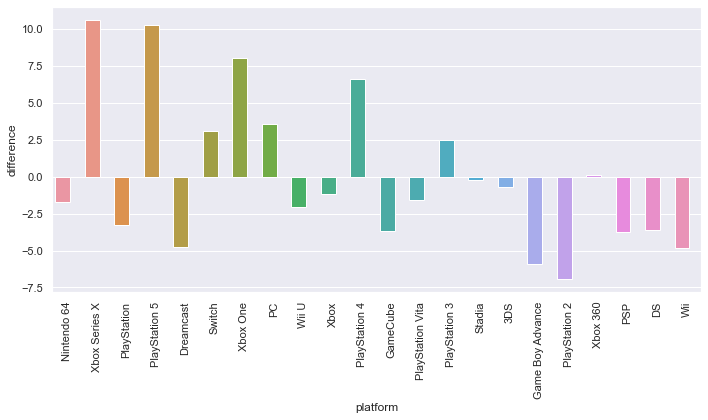

In [47]:
#average critic and user score discrepancy

criticscore_by_platform['difference'] = criticscore_by_platform['metascore']-criticscore_by_platform['user_score']
df_plot = pd.melt(criticscore_by_platform[['platform','metascore','user_score']],id_vars = 'platform').rename(columns={"variable":"score_type"})

fig,ax=plt.subplots(figsize=[10,6])

ax = sns.barplot(data = criticscore_by_platform, x='platform', y='difference', ax=ax)
for patch in ax.patches:
    patch.set_width(0.5)
plt.sca(ax)
ticks = plt.xticks(rotation=90)
plt.tight_layout()

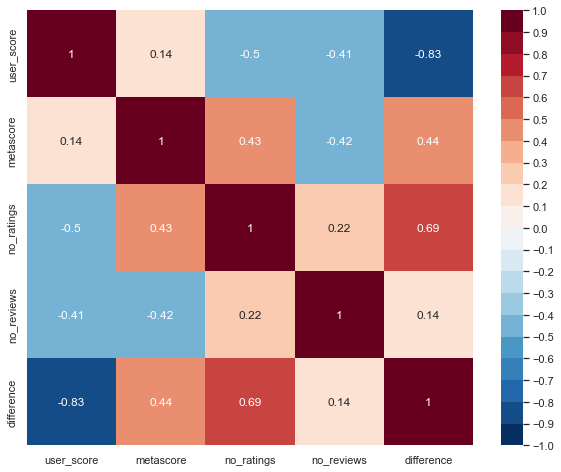

In [48]:

score_cor = criticscore_by_platform.corr()

cmap = plt.cm.RdBu_r
norm = cs.BoundaryNorm(np.arange(-1,1.1,.1), cmap.N)
ax = sns.heatmap(score_cor, cmap=cmap, norm=norm, cbar_kws={'ticks': np.arange(-1,1.1,0.1)}, annot = True)

<AxesSubplot:xlabel='user_score', ylabel='difference'>

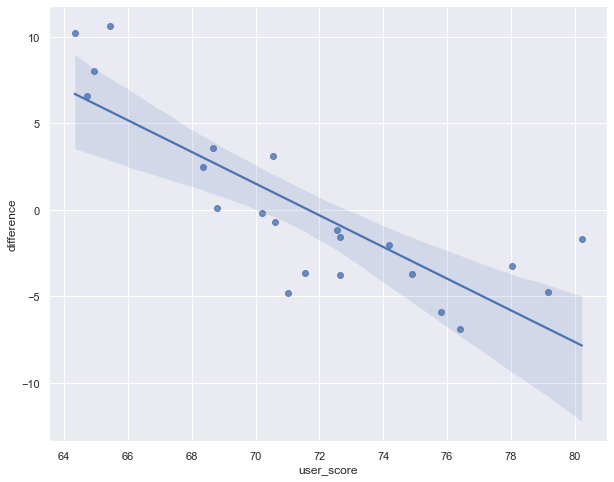

In [49]:
# largest discrepancy between average platform critic score and average platform user score more likely a result of lower user scores for a platform

sns.regplot(data = criticscore_by_platform, x='user_score',y='difference')

# Analysis of sales data and correlations (subset of metacritic data)

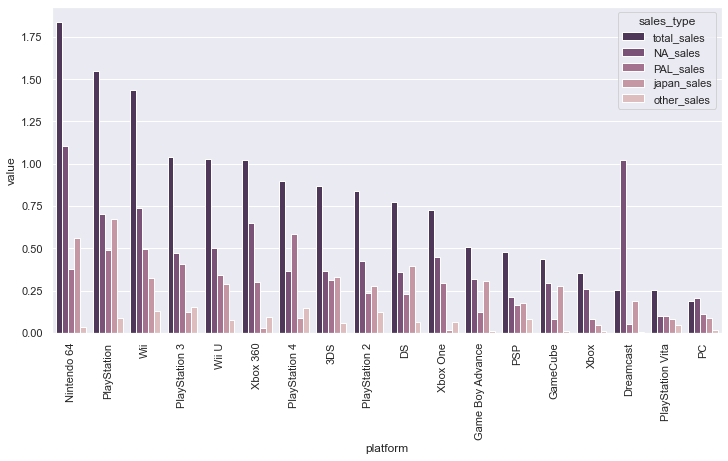

In [80]:
#average sales of games per platform
#N64 is the nest selling platform in total
#Dreamcast overperformed in NA relative to sales in other regions

sales_avg = df_merged.groupby('platform').mean()[sales_columns].reset_index().sort_values('total_sales',ascending=False)
sales_toplot = pd.melt(sales_avg,id_vars='platform').rename(columns = {'variable': 'sales_type'})

fig,ax=plt.subplots(figsize=[12,6])
sns.barplot(data = sales_toplot,x='platform',hue ='sales_type',y='value',ax=ax, palette= sns.cubehelix_palette(reverse=True,light=.9,dark=0.25))
ticks = plt.xticks(rotation=90)


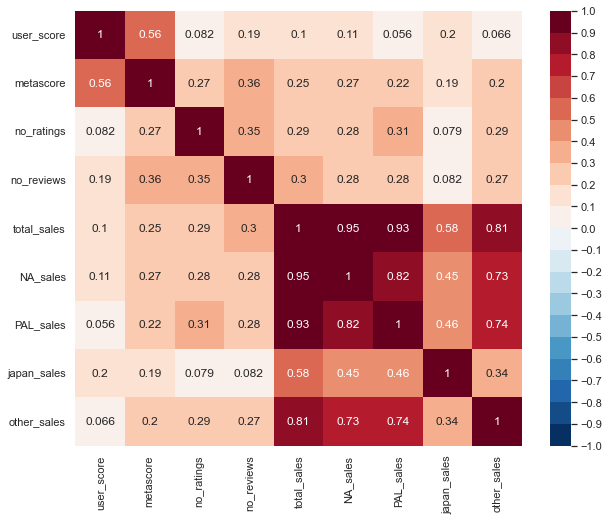

In [89]:
#correlation analysis after removal of missing sales including most recent console generations and no platform aggregation
#Now user score and metascore are more closely aligned
#Total sales are not closely linked to positive reviews

cmap = plt.cm.RdBu_r
norm = cs.BoundaryNorm(np.arange(-1,1.1,.1), cmap.N)
ax = sns.heatmap(df_merged.corr(), cmap=cmap, norm=norm, cbar_kws={'ticks': np.arange(-1,1.1,0.1)}, annot = True)


# Genre analysis

In [122]:
df_genre_avg = df_meta_clean.groupby('genre').mean().reset_index().sort_values('metascore',ascending=False)

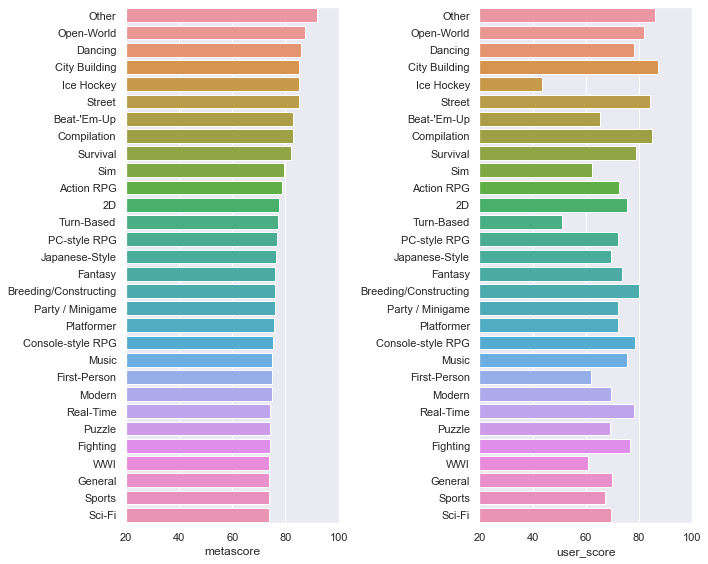

In [129]:
#Critical opinion shows that Other, Open-world, Dancing, City Building and Ice Hocky are the most well recieved.

fig,ax = plt.subplots(ncols = 2)
ax[0] = sns.barplot(data=df_genre_avg.iloc[:30],x='metascore',y='genre',ax=ax[0])
ax[0].set_xlim([20,100])
ax[1] = sns.barplot(data=df_genre_avg.iloc[:30],x='user_score',y='genre',ax=ax[1])
ax[1].set_xlim([20,100])
[a.set_ylabel('') for a in ax]
plt.tight_layout()

In [137]:
df_genre_sales = df_merged.groupby('genre').mean().reset_index().sort_values('total_sales',ascending=False)

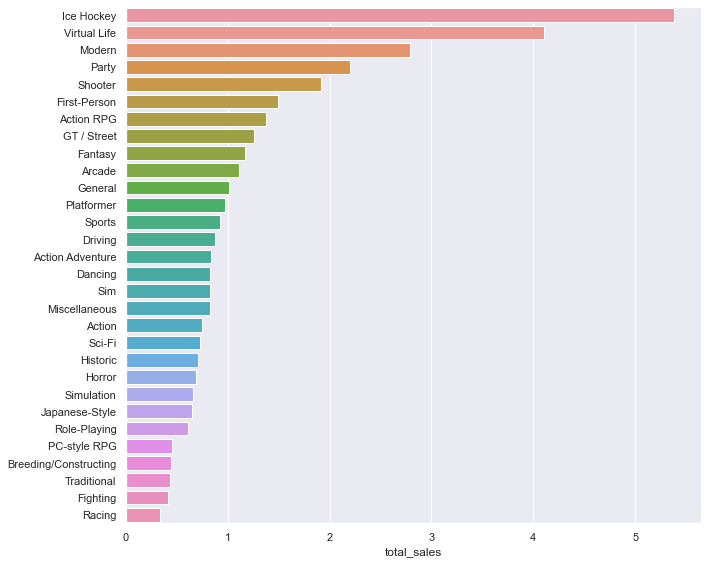

In [138]:
# Ice Hockey games produce the best sales, followed by virtual life, modern, party and shooter games
fig,ax = plt.subplots()
ax = sns.barplot(data=df_genre_sales.iloc[:30],x='total_sales',y='genre',ax=ax)

ax.set_ylabel('')
plt.tight_layout()